# Logistic regresstion from scratch

### Importing the required libraries

In [235]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

### Data preparation

In [421]:
data= load_breast_cancer()

In [422]:
X,y=data.data,data.target

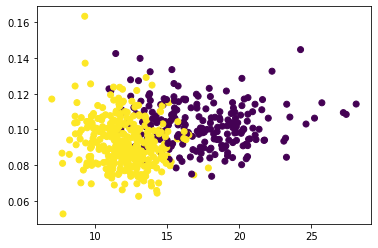

In [423]:
plt.scatter(X[:,0],X[:,4],c=y)

In [424]:
# Splttiting the data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)


In [425]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

### Building the Model

### Binary Classifier

In [426]:
class Logistic_Regression:

    def __init__(self,iteration=10000,lr=0.01):
        self.weights=None
        self.bias=None
        self.iteration=iteration
        self.lr=lr
    
    def fit(self,X,y):
        self.X=X
        self.y =y
        
        if len(X.shape)>1:
            n_samples,n_features=self.X.shape
            self.weights=np.zeros(n_features)
            self.bias=0
        else:
            n_samples=1
            self.weights=1
            self.bias=0
        for i in range(self.iteration):
            
            # Linear function
            
            Z= np.dot(self.X,self.weights)+self.bias
            
            # Sigmoid 
            
            self.y_predicted=self.sigmoid(Z)

            # Cost function
            
            cost=(-1/n_samples)*(sum((self.y*np.log(self.y_predicted))+((1-self.y)*np.log(1-self.y_predicted))))
            
            # Derivative of cost function WRT weights
            
            dm=(-1/n_samples)*np.dot(self.X.T,(self.y-self.y_predicted))
        
            # Derivative of cost function WRT bias
            
            dc=(-1/n_samples)*(sum((self.y-self.y_predicted)))
            
            # Weights Updation
            
            self.weights=self.weights-(self.lr*dm)
            
            self.bias=self.bias-(self.lr*dc)
            
        print("LogisticRegression()")
        
    def liner(self,x):
        Z= np.dot(x,self.weights)+self.bias   
        return Z
    
    def sigmoid(self,Z):
        
        return 1/(1+np.exp(-Z))
    
    def predict(self,x):
        linear=np.array([self.liner(i) for i in x])
        result_Soft=self.sigmoid(linear)
        result =[1 if i>0.5 else 0 for i in result_Soft]
        return result
    
    def one_hot(self,y):
        n_class=len(np.unique(y))
        one_hot = np.zeros((len(y),n_class))
        for i , j in enumerate(y):
            one_hot[i,j]=1
        return one_hot
    
    def coef(self):
        return self.weights
        
    def intercept(self):
        return self.bias
    
model=Logistic_Regression()

In [427]:
# Training the model

model.fit(X_train,y_train)

LogisticRegression()


In [428]:
# Making predictions
predicted=model.predict(X_test)

In [429]:
# Accuracy

sum(predicted==y_test)/len(y_test)

0.9824561403508771

# Comparing with Sklearn model

In [430]:
from sklearn.linear_model import LogisticRegression

### Binary Classifier

In [431]:
classifier = LogisticRegression(multi_class="auto")

In [432]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [433]:
predicted1=classifier.predict(X_test)

In [434]:
# Accuracy

sum(predicted1==y_test)/len(y_test)

0.9824561403508771

### Multiclass Classifier

### Data preparation

In [435]:
data= load_iris()
X,y=data.data,data.target

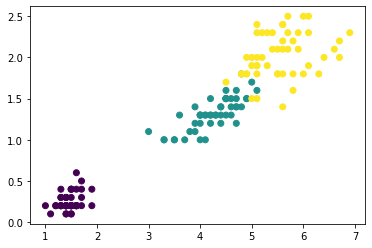

In [436]:
plt.scatter(X[:,2],X[:,3],c=y)

In [437]:
# Splttiting the data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [438]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

### Multiclass Classifier

In [450]:
class Logistic_Regression:

    def __init__(self,iteration=1000,lr=0.1):
        self.weights=None
        self.bias=None
        self.iteration=iteration
        self.lr=lr
    
    def fit(self,X,y):
        self.X=X
        n=len(self.X)
        n_class=len(np.unique(y))
        self.y = self.one_hot(y)
        
        if len(X.shape)>1:
            n_samples,n_features=self.X.shape
            self.weights=np.zeros((n_features,n_class))
            self.bias=np.array(n_class)
        else:
            n_samples=1
            self.weights=1
            self.bias=0
        for i in range(self.iteration):
            
            # Linear function
            
            Z = np.dot(self.X,self.weights)+self.bias
            
            # Softmax 
            
            self.y_predicted=self.softmax(Z)
            
            # Cost function
            
            cost=-(1/n_samples)*(sum(self.y*np.log(self.y_predicted)))
            
            # Derivative of cost function WRT weights
            
            dm=(-1/n_samples)*(((self.y-self.y_predicted)).T.dot(self.X))
        
            # Derivative of cost function WRT bias
            
            dc=(-1/n_samples)*(sum(self.y-self.y_predicted))
            
            # Weights Updation
            
            self.weights=self.weights-(self.lr*dm.T)
            
            self.bias=self.bias-(self.lr*dc.T)
            
        print("LogisticRegression()")
        
    def liner(self,x):
        Z= np.dot(x,self.weights)+self.bias   
        return Z
    
    def softmax(self,Z):
        expA=np.exp(Z)
        return expA/expA.sum(axis=1,keepdims=True)
    
    def predict(self,x):
        linear=np.array([self.liner(i) for i in x])
        result_Soft=self.softmax(linear)
        result = np.argmax(result_Soft,axis=1)
        return result
    
    def one_hot(self,y):
        n_class=len(np.unique(y))
        one_hot = np.zeros((len(y),n_class))
        for i , j in enumerate(y):
            one_hot[i,j]=1
        return one_hot
    
    def coef(self):
        return self.weights
        
    def intercept(self):
        return self.bias
    
Multinomial_model=Logistic_Regression()

In [451]:
# Training the model

Multinomial_model.fit(X_train,y_train)

LogisticRegression()


In [452]:
# Making predictions
predicted=Multinomial_model.predict(X_test)

In [453]:
# Accuracy

sum(predicted==y_test)/len(y_test)

0.9666666666666667

# Comparing with Sklearn model

In [454]:
from sklearn.linear_model import LogisticRegression

### Multiclass Classifier

In [455]:
classifier2 = LogisticRegression(multi_class="multinomial")

In [456]:
classifier2.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [457]:
predicted2=classifier2.predict(X_test)

In [458]:
# Accuracy

sum(predicted2==y_test)/len(y_test)

0.9666666666666667